In [77]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

In [78]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [79]:
import numpy as np

In [80]:
import pandas as pd

from sklearn.model_selection import train_test_split

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
from scipy.stats import zscore

In [83]:
import seaborn as sns

## Question 1

Import the data set and print 10 random rows from the data set

In [85]:
features=['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm','class']
iris_df=pd.read_csv('iris.csv',names=features)
iris_df.sample(10)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
123,6.3,2.7,4.9,1.8,Iris-virginica
112,6.8,3.0,5.5,2.1,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
121,5.6,2.8,4.9,2.0,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica
35,5.0,3.2,1.2,0.2,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
54,6.5,2.8,4.6,1.5,Iris-versicolor


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [86]:
iris_df.isnull().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

In [87]:
iris_df.applymap(np.isreal).all()

sepal length in cm     True
sepal width in cm      True
petal length in cm     True
petal width in cm      True
class                 False
dtype: bool

In [196]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy='median',axis=1)  
iris_df_input=iris_df.drop(['class'],axis=1)
iris_df_output=iris_df['class']
imputer.fit_transform(iris_df_input)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [89]:
iris_df['class']=iris_df['class'].astype('category').cat.codes

In [90]:
iris_df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [91]:
iris_df.groupby(['class']).count()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
class,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


In [92]:
#the data is evenly distributed among the classes

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [93]:
corr = iris_df[['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm','class']].corr()

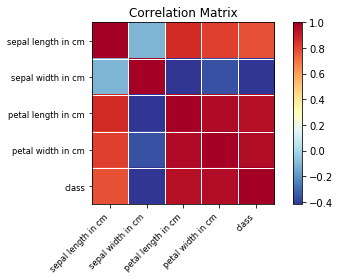

In [94]:
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt 
smg.plot_corr(corr, xnames=list(corr.columns))
plt.show()

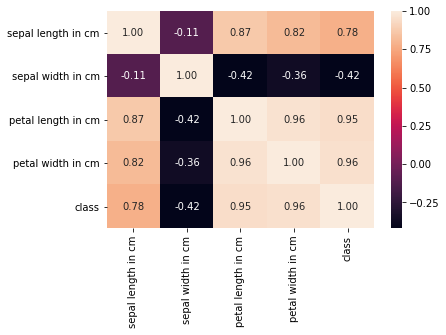

In [95]:
sns.heatmap(corr,annot=True,fmt='0.2f')

In [96]:
print("I'm observing the last row. I don't see any column that have correlation value in the range -0.1 to 0.1.")
print("So there are no columns to be dropped")

I'm observing the last row. I don't see any column that have correlation value in the range -0.1 to 0.1.
So there are no columns to be dropped


In [97]:
corr_matrix=iris_df.corr()
cols=iris_df.columns.drop(['class'])

for x in cols:
    r=corr_matrix[x]['class']
    if(r>-0.1 and r<0.1):
        print("Column with low correlation that is being dropped is:  {}".format(x))
        iris_df.drop([x],axis=1,inplace=True)

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [98]:
result=np.var(iris_df_input,ddof=1)
result

sepal length in cm    0.685694
sepal width in cm     0.188004
petal length in cm    3.113179
petal width in cm     0.582414
dtype: float64

In [99]:
for x in cols:
    v=result[x]
    if(v<0.1) :
         print("Column with low correlation that is being dropped is:  {}".format(x))
         iris_df_input.drop([x],axis=1,inplace=True)

In [100]:
print("Since none of the columns show variance less than 0.1, nothing to drop")

Since none of the columns show variance less than 0.1, nothing to drop


## Question 6

*Plot the scatter matrix for all the variables.*

In [101]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FA03B38>,
      dtype=object)

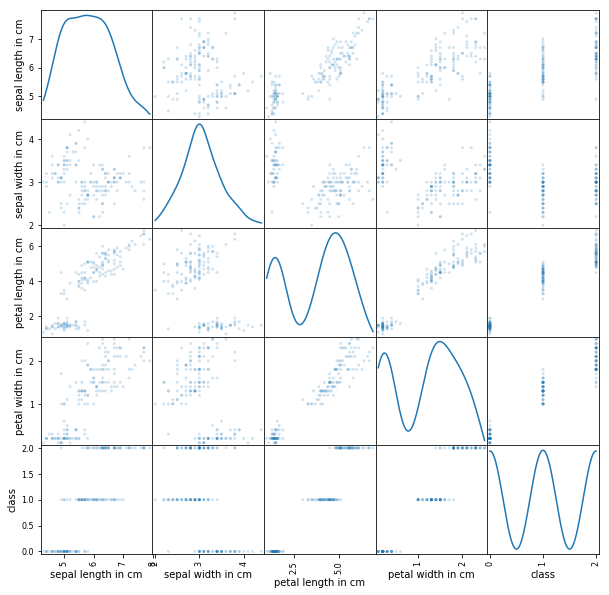

In [102]:
scatter_matrix(iris_df, alpha=0.2, figsize=(10, 10), diagonal='kde')

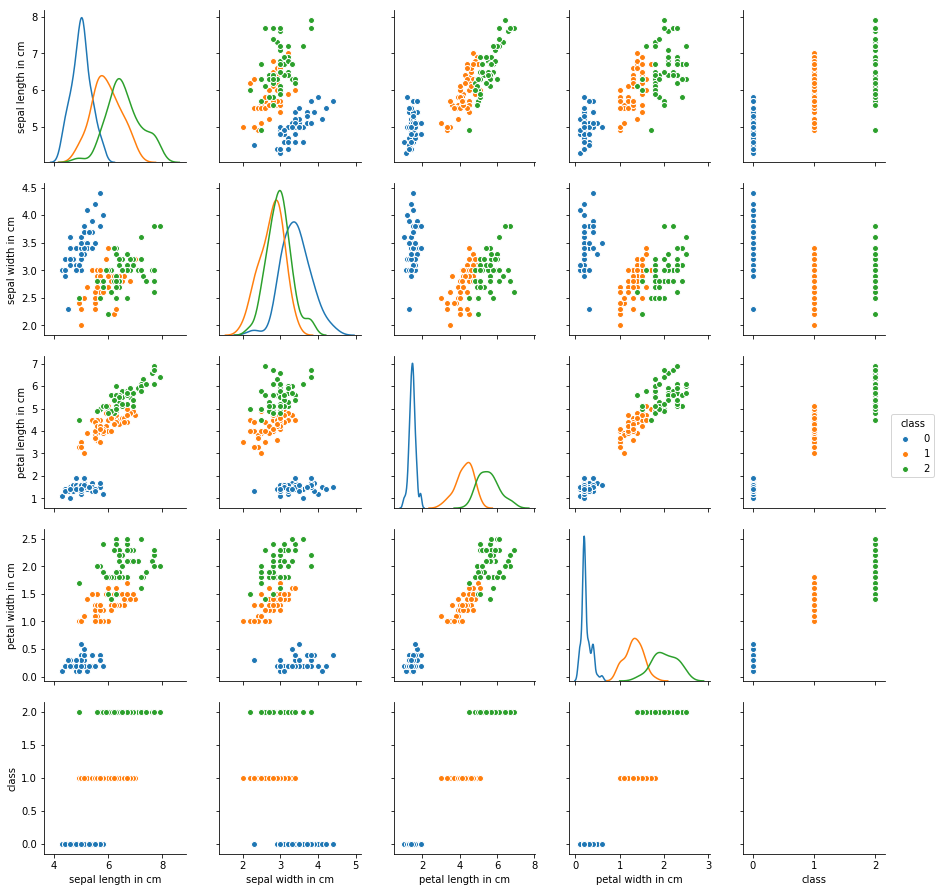

In [103]:
sns.pairplot(iris_df,hue='class' , diag_kind = 'kde')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [118]:
X = np.array(iris_df_input)
X.shape
y=np.array(iris_df_output)
y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [132]:
from sklearn.metrics import accuracy_score

In [133]:
NNH3 = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )

In [134]:
NNH3.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [135]:
predicted_labels=NNH3.predict(X_test)
NNH3.score(X_test,y_test)

1.0

In [136]:
accuracy_score(y_test,predicted_labels)

1.0

In [137]:
NNH5 = KNeighborsClassifier(n_neighbors= 5,weights= 'distance')
NNH5.fit(X_train,y_train)
predicted_labels=NNH5.predict(X_test)
NNH5.score(X_test,y_test)
accuracy_score(y_test,predicted_labels)

1.0

In [162]:
NNH9 = KNeighborsClassifier(n_neighbors= 9,weights= 'distance')
NNH9.fit(X_train,y_train)
predicted_labels=NNH9.predict(X_test)
NNH9.score(X_test,y_test)
predicted_score=accuracy_score(y_test,predicted_labels)
print(predicted_score)

0.9666666666666667


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
#predicted_score_1=np.zeros(10)
MSE=np.zeros(10)
kvalue=np.zeros(10)
cvscore=[]

from sklearn.model_selection import cross_val_score

for i in range (1,20):
    if(i%2==1):
        NNH = KNeighborsClassifier(n_neighbors= i , weights = 'distance' )
        NNH.fit(X_train,y_train)
        indx=int(i/2)
        kvalue[indx]=int(i)
        predicted_labels[indx]=NNH.predict(X_test)
        ascore=accuracy_score(y_test,predicted_labels[indx])
        cv_score=cross_val_score(NNH, X_train, y_train, cv=5)
        cvscore.append(cv_score.mean())
        print(cv_score)
        MSE[indx]=1-ascore
        print(kvalue[indx],"{0:.2f}".format(MSE[indx]))

[0.96       0.92       1.         0.95833333 0.86363636]
1.0 0.00
[0.96       0.96       1.         0.95833333 0.90909091]
3.0 0.00
[0.96       0.96       1.         0.95833333 0.90909091]
5.0 0.00
[0.96       0.92       1.         0.95833333 0.95454545]
7.0 0.03
[0.96       0.92       1.         0.95833333 0.95454545]
9.0 0.03
[1.         0.96       1.         0.95833333 0.95454545]
11.0 0.03
[1.         0.96       1.         0.95833333 0.95454545]
13.0 0.03
[1.         0.96       1.         0.95833333 0.90909091]
15.0 0.03
[1.         0.96       1.         0.95833333 0.95454545]
17.0 0.03
[1.         0.96       1.         0.95833333 0.90909091]
19.0 0.03


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

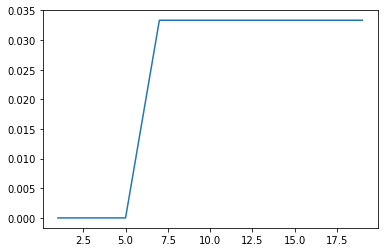

In [203]:
plt.plot(kvalue,MSE)

# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [257]:
student_mat_df=pd.read_csv('student-mat.csv',delimiter=';')
student_mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Question 2 - drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [258]:
student_mat_df.index.names=['number']
student_mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [259]:
missing_values=student_mat_df.columns[student_mat_df.isnull().any()]
student_mat_df[missing_values].isnull().sum()

Series([], dtype: float64)

In [260]:
print("No missing values observed")

No missing values observed


In [261]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy='mean',axis=1)  
#student_mat_df_input=student_mat_df.drop(['class'],axis=1)
student_mat_df_output=student_mat_df['G3']
imputer.fit_transform(iris_df_input)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Transform Data

## Question 3

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [262]:
print(student_mat_df.select_dtypes(exclude=['number']).columns)
print(student_mat_df.select_dtypes(exclude=['number']).columns.size)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')
17


# Question 4 - Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [263]:
result=np.var(student_mat_df,ddof=1)
result

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [269]:
cols = student_mat_df.select_dtypes(include=['number']).columns

for x in cols:
    v=result[x]
    if(v<1) :
         print("Column with low correlation that is being dropped is:  {}".format(x))
         student_mat_df.drop([x],axis=1,inplace=True)

In [270]:
print(student_mat_df.shape)

(395, 27)


#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 5 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [271]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cols = student_mat_df.select_dtypes(include=['object']).columns

for c in cols :
    student_mat_df[c]=labelencoder.fit_transform(student_mat_df[c])
    
student_mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


# Question 6 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

# Question 7

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

Answer

# Question 8 - Training and testing data split

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

# Question 9 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

# Question 10 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

# Question 11 - Print the coefficients of the model and name the coefficient which has the highest impact on the dependent variable

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

# Question 12 - Predict the dependent variable for both training and test dataset

Accuracy score() should help you to print the accuracies